In [2]:
import sys
sys.path.insert(0, "/home/ubuntu/data/code/Modules/")
import skimage
import numpy as np
import pickle
import gc
from albumentations import Compose,HorizontalFlip, VerticalFlip, ToFloat
from sklearn.metrics import confusion_matrix
import cv2
import matplotlib.pyplot as plt
from keras import backend
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, BatchNormalization, Flatten, Dropout
from keras.optimizers import SGD,Adadelta, RMSprop, Adam
import DataGenerator
from albumentations import Compose,HorizontalFlip, VerticalFlip, ToFloat
from sklearn.model_selection import KFold
import random
import glob
import CNN_Module as cnn_module
import models
import time

Using TensorFlow backend.


In [14]:
import pickle
import numpy as np
d3_cipro = pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_final_cipro.p','rb'))
#print(result_cipro[0])
d3_cipro_val_acc = d3_cipro[0]
d3_cipro_avg = np.mean(d3_cipro_val_acc, axis = 0)
d3_cipro_std = np.std(d3_cipro_val_acc,axis=0)

cipro_avg_cut_3d = d3_cipro_avg[:25]
cipro_std_cut_3d = d3_cipro_std[:25]
print(len(cipro_avg_cut_3d))
print(cipro_avg_cut_3d)

d3_ceph = pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_ceph5.p','rb'))
d3_ceph_val_acc = d3_ceph[0]
d3_ceph_avg = np.mean(d3_ceph_val_acc, axis = 0)
d3_ceph_std = np.std(d3_ceph_val_acc,axis=0)

d3_trim = pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_trim.p','rb'))
d3_trim_val_acc = d3_trim[0]
d3_trim_avg = np.mean(d3_trim_val_acc, axis = 0)
d3_trim_std = np.std(d3_trim_val_acc,axis=0)

25
[0.63008559 0.66578078 0.65856607 0.6628979  0.66397748 0.70442643
 0.70543994 0.70456006 0.71074474 0.74467417 0.73407658 0.71326727
 0.72443544 0.75539039 0.75324024 0.74230931 0.7267988  0.74082432
 0.76027177 0.75407357 0.72886637 0.74697447 0.75274474 0.7184024
 0.73136637]


In [15]:
import pickle
import numpy as np
result_cipro = pickle.load(open('/home/ubuntu/data/code/2dCNN/cipro_of2.p','rb'))
#print(result_cipro[0])
cipro_val_acc = result_cipro[1]
cipro_avg = np.mean(cipro_val_acc, axis = 0)
cipro_std = np.std(cipro_val_acc,axis=0)

cipro_avg_cut = cipro_avg[:25]
cipro_std_cut = cipro_std[:25]
print(len(cipro_avg_cut))
print(cipro_avg_cut)

result_ceph = pickle.load(open('/home/ubuntu/data/code/2dCNN/ceph_model2_lr001.p','rb'))
ceph_val_acc = result_ceph[1]
ceph_avg = np.mean(ceph_val_acc, axis = 0)
ceph_std = np.std(ceph_val_acc,axis=0)

ceph_avg_cut = ceph_avg[:25]
ceph_std_cut = ceph_std[:25]
print(len(ceph_avg_cut))
print(ceph_avg_cut)

result_trim = pickle.load(open('/home/ubuntu/data/code/2dCNN/trim_model2_lr005.p','rb'))
trim_val_acc = result_trim[1]
trim_avg = np.mean(trim_val_acc, axis = 0)
trim_std = np.std(trim_val_acc,axis=0)

trim_avg_cut = trim_avg[:25]
trim_std_cut = trim_std[:25]
print(len(trim_avg_cut))
print(trim_avg_cut)

25
[0.530358   0.63239796 0.68018364 0.66355133 0.7019094  0.70756287
 0.67419089 0.68735312 0.71955525 0.71973133 0.71860699 0.71029341
 0.71573215 0.71884663 0.72161324 0.71075723 0.73049457 0.71298358
 0.73258091 0.70789614 0.73730932 0.72450096 0.71707638 0.71008469
 0.71736412]
25
[0.62178313 0.65974672 0.71237939 0.71684004 0.73449231 0.76095281
 0.74393562 0.73422848 0.75409882 0.77028682 0.75283243 0.77094829
 0.76225124 0.78683288 0.77787766 0.76990615 0.78333333 0.79305556
 0.79222825 0.79561284 0.79306875 0.79578057 0.77754033 0.81249058
 0.8010836 ]
25
[0.6395424  0.70025146 0.71413304 0.70891228 0.73885819 0.7316345
 0.7339693  0.7353348  0.74345468 0.74248538 0.74121784 0.74623246
 0.75112135 0.72932749 0.76015497 0.75265497 0.75619298 0.75442836
 0.7555848  0.76419883 0.76037427 0.76952632 0.75416959 0.7633348
 0.75073538]


[0.530358   0.63239796 0.68018364 0.66355133 0.7019094  0.70756287
 0.67419089 0.68735312 0.71955525 0.71973133 0.71860699 0.71029341
 0.71573215 0.71884663 0.72161324 0.71075723 0.73049457 0.71298358
 0.73258091 0.70789614 0.73730932 0.72450096 0.71707638 0.71008469
 0.71736412]
0.721267094
[0.63008559 0.66578078 0.65856607 0.6628979  0.66397748 0.70442643
 0.70543994 0.70456006 0.71074474 0.74467417 0.73407658 0.71326727
 0.72443544 0.75539039 0.75324024 0.74230931 0.7267988  0.74082432
 0.76027177 0.75407357 0.72886637 0.74697447 0.75274474 0.7184024
 0.73136637]
0.73567087


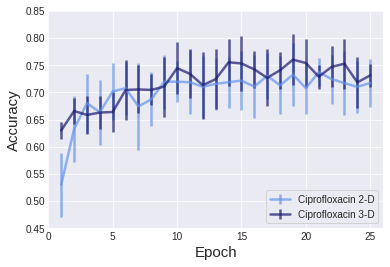

In [27]:
x_vals=np.arange(1,26)
plt.style.use('seaborn-darkgrid')

plt.errorbar(x_vals,cipro_avg_cut,cipro_std_cut,color='cornflowerblue',alpha=0.7,linewidth = 2.5, label='Ciprofloxacin 2-D')
plt.errorbar(x_vals,cipro_avg_cut_3d,cipro_std_cut_3d,color='midnightblue',alpha=0.7,linewidth = 2.5, label='Ciprofloxacin 3-D')

plt.legend(loc='lower right',frameon=True, fontsize=10)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Epoch', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 35, 5))
plt.yticks(np.arange(0.45, 85, 0.05))
plt.xlim(0,26)
plt.ylim(0.45,0.85)

plt.savefig('/home/ubuntu/data/code/final_graphs/cipro_graph', dpi=500)

print(cipro_avg_cut)
last_5_2d = (0.73730932 +0.72450096+ 0.71707638+ 0.71008469+ 0.71736412)/5
print(last_5_2d)

print(cipro_avg_cut_3d)

last_5_3d = (0.72886637 +0.74697447 +0.75274474 +0.7184024 +0.73136637)/5
print(last_5_3d)

[0.6395424  0.70025146 0.71413304 0.70891228 0.73885819 0.7316345
 0.7339693  0.7353348  0.74345468 0.74248538 0.74121784 0.74623246
 0.75112135 0.72932749 0.76015497 0.75265497 0.75619298 0.75442836
 0.7555848  0.76419883 0.76037427 0.76952632 0.75416959 0.7633348
 0.75073538]
0.759628072
[0.64529895 0.70566142 0.71472575 0.75009831 0.72229028 0.75676548
 0.7370614  0.75846693 0.74444949 0.76672716 0.76594323 0.75752924
 0.76416112 0.76057925 0.75835098 0.75939201 0.75545221 0.76119177
 0.76227818 0.7475247  0.76190512 0.77127193 0.76835804 0.75175943
 0.75043356]
0.760745616


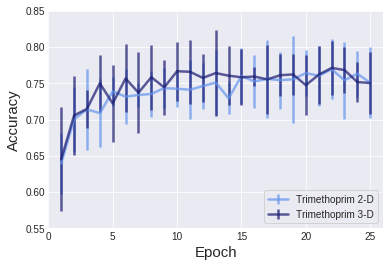

In [28]:
x_vals1=np.arange(1,31)
x_vals2=np.arange(1,26)
plt.style.use('seaborn-darkgrid')

plt.errorbar(x_vals2,trim_avg_cut,trim_std_cut,color='cornflowerblue',alpha=0.7,linewidth = 2.5, label='Trimethoprim 2-D')
plt.errorbar(x_vals2,d3_trim_avg,d3_trim_std,color='midnightblue',alpha=0.7,linewidth = 2.5, label='Trimethoprim 3-D')


plt.legend(loc='lower right',frameon=True, fontsize=10)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Epoch', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 35, 5))
plt.yticks(np.arange(0.45, 85, 0.05))
plt.xlim(0,26)
plt.ylim(0.55,0.85)

plt.savefig('/home/ubuntu/data/code/final_graphs/trim_graph', dpi=500)
print(trim_avg_cut)
last_5_2d = (0.76037427 +0.76952632 +0.75416959 +0.7633348 +0.75073538)/5
print(last_5_2d)

print(d3_trim_avg)
last_5_3d = (0.76190512+ 0.77127193 +0.76835804+ 0.75175943 +0.75043356)/5
print(last_5_3d)

[0.62178313 0.65974672 0.71237939 0.71684004 0.73449231 0.76095281
 0.74393562 0.73422848 0.75409882 0.77028682 0.75283243 0.77094829
 0.76225124 0.78683288 0.77787766 0.76990615 0.78333333 0.79305556
 0.79222825 0.79561284 0.79306875 0.79578057 0.77754033 0.81249058
 0.8010836 ]
0.795992766
[0.67696078 0.71323529 0.74934641 0.71683007 0.73006536 0.80653595
 0.79836601 0.74153595 0.73771242 0.7875817  0.75539216 0.8003268
 0.73937908 0.80196078 0.7745098  0.7777451  0.7879085  0.81862745
 0.77173203 0.80669935 0.75833333 0.81388889 0.79379085 0.76944444
 0.78823529]
0.7847385600000001


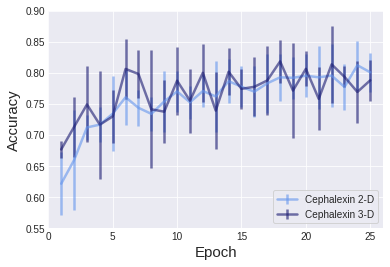

In [30]:

x_vals2=np.arange(1,26)
plt.style.use('seaborn-darkgrid')

plt.errorbar(x_vals2,ceph_avg_cut,ceph_std_cut,color='cornflowerblue',alpha=0.6,linewidth = 2.5, label='Cephalexin 2-D')
plt.errorbar(x_vals2,d3_ceph_avg,d3_ceph_std,color='midnightblue',alpha=0.6,linewidth = 2.5, label='Cephalexin 3-D')

plt.legend(loc='lower right',frameon=True, fontsize=10)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Epoch', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 35, 5))
plt.yticks(np.arange(0.45, 85, 0.05))
plt.xlim(0,26)
plt.ylim(0.55,0.90)

plt.savefig('/home/ubuntu/data/code/final_graphs/ceph_graph', dpi=500)
print(ceph_avg_cut)
last_5_2d = (0.79306875 +0.79578057+ 0.77754033+ 0.81249058+0.8010836)/5
print(last_5_2d)

print(d3_ceph_avg)
last_5_3d = (0.75833333+ 0.81388889 +0.79379085+ 0.76944444+0.78823529)/5
print(last_5_3d)